<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


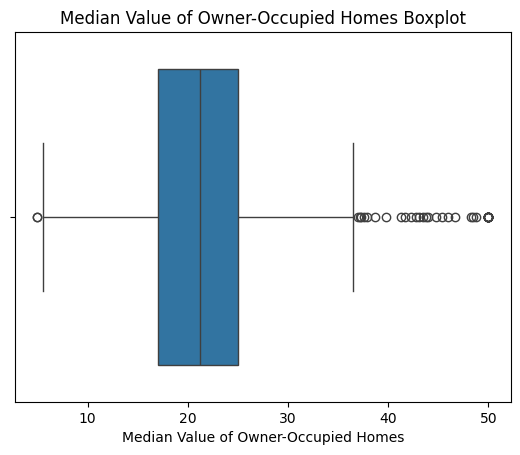

In [5]:
#boxplot for median value of owner-occupied homes

ax = sns.boxplot(x='MEDV', data=boston_df)
ax.set(xlabel='Median Value of Owner-Occupied Homes')
pyplot.title("Median Value of Owner-Occupied Homes Boxplot")
pyplot.show()

The median value is around 22, with a large number of values above the 75th quartile.

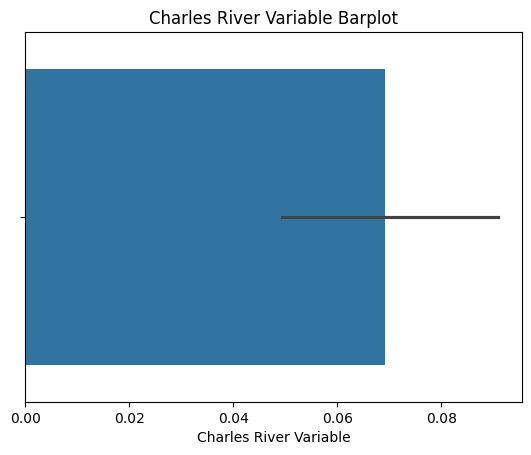

In [6]:
#bar plot for the Charles river variable

ax = sns.barplot(x="CHAS", data=boston_df)
ax.set(xlabel='Charles River Variable')
pyplot.title("Charles River Variable Barplot")
pyplot.show()

The average of the Charles River Variable is around 0.07

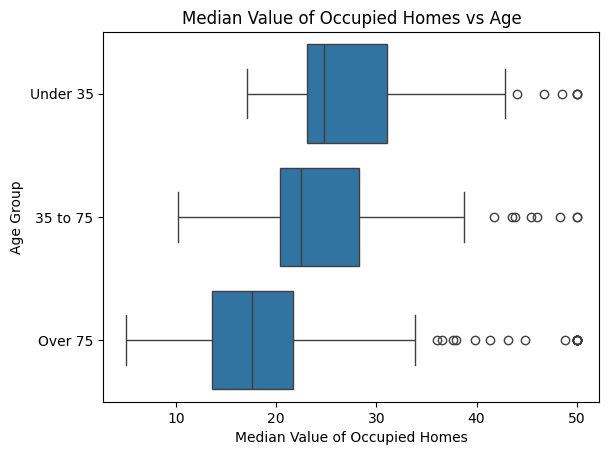

In [7]:
#boxplot for the MEDV variable vs the AGE variable

boston_df["Discrete_Age"] = pd.cut(x=boston_df["AGE"].astype(float), bins=[0,36,76,float('inf')], labels=["Under 35","35 to 75","Over 75"])

ax = sns.boxplot(x='MEDV', y='Discrete_Age', data=boston_df)
ax.set(xlabel='Median Value of Occupied Homes', ylabel='Age Group')
pyplot.title("Median Value of Occupied Homes vs Age")
pyplot.show()

The median value of occupied homes appears to decrease as the age group increases

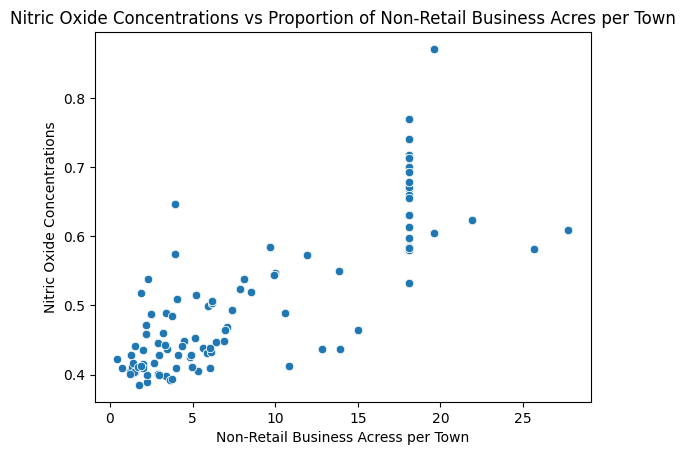

In [8]:
#scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set(xlabel='Non-Retail Business Acress per Town', ylabel="Nitric Oxide Concentrations")
pyplot.title("Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town")
pyplot.show()

The proportion of Non-Retail Business Acres seems to increase alongside Nitric Oxide Concentrations.

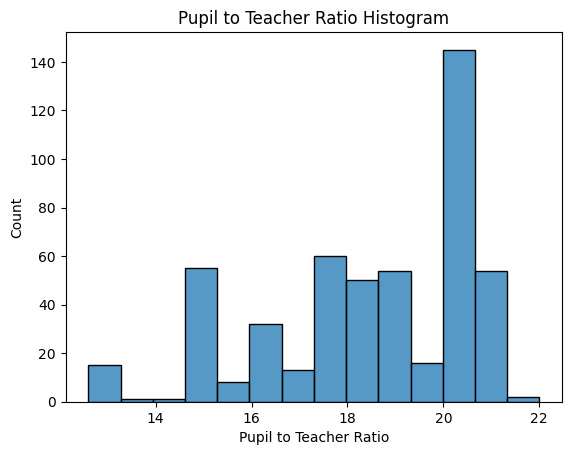

In [9]:
#histogram for the pupil to teacher ratio variable

ax = sns.histplot(x='PTRATIO', data=boston_df)
ax.set(xlabel='Pupil to Teacher Ratio')
pyplot.title("Pupil to Teacher Ratio Histogram")
pyplot.show()

The most common Pupil to Teacher ratio is around 20

In [11]:
#T-Test for independant samples - median value of houses bounded by the Charles river

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

The null hypothesis, is that there is no significant difference between the median value of houses bounded by the Charles River. Performing a T-test provides a pvalue of 7.390623170519905e-05 which is significantly lower than 0.05. Due to this, the conclusion is that we reject the null hypothesis, showing there is a significant difference between the median value of houses bounded by the Charles River.

In [13]:
#ANOVA - Is there a difference in Median values of houses for each proportion of owner occupied units built
#prior to 1940

from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


The p-value is below 0.05, so the null hypothesis is rejected, showing that there is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [14]:
#Pearson Correlation - Can we conclude there is no relationship between Nitric Oxice Concetrations and Proportions
#of Non-Retail Business Acres per Town

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS']) 

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Given that the p-value less than 0.05, we reject the Null Hypothesis as there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town

In [17]:
#Regression Analysis - What is the impact of an additionally weighted distance to the five Boston empployment
#centres on the median value of owner occupied homes?

x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
prediction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:35:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coef DIS of 1.0916 indicates that an additional weighted distance to the 5 employment centers in boston increases the median value of owner occupied homes by 1.0916